In [11]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace import sarimax
from scipy.stats import boxcox

from load_dataset import Dataset
import plotting

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
dataset = Dataset('../data/Dataset')

In [17]:
ts = dataset['international-airline-passengers.csv']
ts.index = ts.index.map(pd.to_datetime)

In [18]:
ts, ts_test = ts[:100], ts[100:]

<AxesSubplot:xlabel='1949-01'>

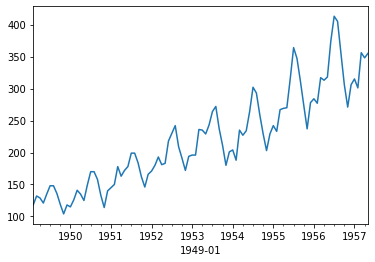

In [19]:
ts.plot()

#### Задание 1. Box-Jenkins approach
1. Убрать гетероскедастичность при помощи логарифмирования.
2. Продифференцировать разными способами и узнать нужный порядок дифференцирования d, D, анализируя
   получившийся ряд при помощи графика acf_plot и теста дикки-фуллера.
3. Найти (если модель разделима) или оценить (если не разделима) параметры (q, Q), (p, P) по графикам acf, pacf продифференцированного ряда.
4. Обучить модель SARIMA и попробовать сделать предсказания исходного ряда.
5. Критерий хорошей модели (в идеале) - стационарные остатки.

In [9]:
# <ваш код здесь>

#### Задание 2. (используя критерий Акаике)
1. Взять параметры дифференцирования d, D из задания 1.
2. Выбрать сетку гиперпараметров (не брать большие значения).
3. Для кадого набора параметров:
    * обучить модель SARIMAX на логарифмированном ряде (все остальные преобразования к стационарному ряду модель сделает за вас)
    * получить aic модели (хранится в аттрибуте aic обученной модели)
    * запомнить aic для такого-то набора параметров
4. Выбрать модель с набором гиперпараметров, дающих минимальный aic.
5. Сделать предсказание ts_log на тестовую выборку. 
6. Восстановить предсказания обратным преобразованием.
7. Проанализировать остатки

In [10]:
# ваш код здесь

#### Задание 3. (используя auto-arima)
1. Установить аналог auto-arima из R, библиотеку pmdarima (pip install pmdarima)
2. Обучить модель, используя функцию auto_arima, передав в нее нужные параметры.